<a href="https://colab.research.google.com/github/catalinagarciamiranda/Machine_learning/blob/main/w1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

## Description
This code applies four linear regression models to a dataset to analyze and predict gene expression. It includes various steps such as:

- **Data Preparation**: Loading and preprocessing the data.
- **Model Building**: Creating and fitting linear regression models for different scenarios.
- **Evaluation**: Calculating and comparing statistical metrics (R-squared, AIC, BIC, MSE) for each model.
- **Visualization**: Generating plots to visualize model performance and residuals.
- **Comparison**: Summarizing and comparing model statistics to evaluate their effectiveness.

## Built With
- **Google Colaboratory**: The code is developed and executed in Google Colaboratory, a cloud-based platform that supports Python and various data science libraries.

## Author
- **Catalina García Miranda**

## Requirements
- **Python Libraries**: Ensure the following Python libraries are installed:
  - `pandas`
  - `numpy`
  - `matplotlib`
  - `seaborn`
  - `statsmodels`
  - `scikit-learn`


## Import relevant libraries

In [1]:
# Pandas for data manipulation and analysis
import pandas as pd

# NumPy for numerical operations and array manipulation
import numpy as np

# Matplotlib for basic data visualizations
import matplotlib.pyplot as plt

# Seaborn for advanced and statistical visualizations
import seaborn as sns

# Statsmodels for statistical models and testing
import statsmodels.api as sm

# Formula API for specifying models with formula strings
import statsmodels.formula.api as smf

# To split the data into training and testing sets
from sklearn.model_selection import train_test_split

# For standardizing features before model training
from sklearn.preprocessing import StandardScaler

# For calculating performance metrics like MSE
from sklearn.metrics import mean_squared_error


In [2]:
# get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data

Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38 (from 1)
Receiving objects: 100% (38/38), 6.73 MiB | 789.00 KiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (12/12), done.


In [3]:
# Load the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv('data/data_labeled_fixed.csv')

# Remove any hyphens ("-") from column names
data.columns = data.columns.str.replace("-", "")

In [5]:
# Create a new DataFrame with expression values and the cell class label,
# but without the cell type label (i.e., the second-to-last column)
dataweek1 = data.drop(data.columns[-2], axis=1)

# Create a DataFrame containing only expression values,
# excluding both the cell class label and the cell type label
X_data = data.drop(data.columns[-2:], axis=1)

# Display the first 10 rows of the 'dataweek1' DataFrame
dataweek1.head(10)

,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,Zranb2,mtCo1,mtCytb,mtNd1,mtNd2,mtNd4,mtNd5,mtRnr1,mtRnr2,CLASS
0,3,0,0,1,2,0,1,0,3,2,...,0,0,12,3,5,5,4,2,25,Cone Bipolar ON
1,0,1,0,0,0,0,3,0,0,4,...,0,1,5,1,0,2,1,0,16,Cone Bipolar OFF
2,0,0,0,0,0,0,2,1,0,0,...,2,0,12,5,3,10,4,1,14,Cone Bipolar ON
3,0,1,0,4,0,0,1,0,0,1,...,0,0,8,1,3,3,1,0,7,Cone Bipolar OFF
4,0,1,0,1,0,0,7,1,2,4,...,0,0,17,7,3,0,4,0,3,Cone Bipolar ON
5,0,1,0,3,0,0,2,0,1,4,...,0,1,11,2,2,2,0,1,7,Rod Bipolar
6,4,1,1,4,1,0,1,1,0,12,...,0,0,8,7,1,3,4,0,9,Cone Bipolar ON
7,0,0,1,0,0,0,2,2,0,3,...,0,3,4,0,4,2,3,2,11,Cone Bipolar OFF
8,1,4,2,0,0,0,0,0,0,1,...,1,2,16,0,1,0,4,1,27,Rod Bipolar
9,0,2,1,0,0,0,0,0,0,4,...,0,1,22,7,5,6,0,1,13,Rod Bipolar


In [7]:
# Initialize the StandardScaler to standardize the variables
scaler = StandardScaler()

# Select all columns except 'Calm1' for standardization
X = X_data.loc[:, X_data.columns != 'Calm1']

# Apply standardization (mean = 0, std = 1) to the selected columns
X_scaled = scaler.fit_transform(X)

# Set 'Calm1' as the target variable (dependent variable)
y = dataweek1['Calm1']

# Linear regresions

Predict the expression values of the genes Calm1 and Malat1 using the expression of other genes. Make two regression models for each of the two genes.
-	one using only the cells corresponding to the Class for which the selected gene is highly expressed (for Calm1, this is Class “Rod Bipolar”; for Malat1, this is “Amacrine”)
-	one using all cells.


In [8]:
# Function to generate a regression formula for statsmodels
def lm_formula(df, dependent_var, excluded_cols=[]):
    '''
    Generates an R-style formula string for statsmodels
    regression model, given the dataframe `df`, the
    dependent variable (`dependent_var`), and a list of
    optional columns to exclude from the model (`excluded_cols`).

    Parameters:
    - df: The DataFrame containing the data.
    - dependent_var: The dependent variable (gene expression)
      to predict.
    - excluded_cols: A list of columns to exclude from the
      formula.

    Returns:
    - A formula string for statsmodels of the form
      'dependent_var ~ predictor1 + predictor2 + ...'
    '''
    # Get all column names from the DataFrame
    df_columns = list(df.columns.values)

    # Remove the dependent variable from the list of predictors
    df_columns.remove(dependent_var)

    # Remove any additional excluded columns if provided
    for col in excluded_cols:
        df_columns.remove(col)

    # Create the formula string in the format 'dependent_var ~ predictor1 + predictor2 + ...'
    return dependent_var + ' ~ ' + ' + '.join(df_columns)


## Model 1:

Response: Gene Calm1

Predictors: cells in CLASS Rod Bipolar

In [9]:
# Filter the DataFrame to include only rows where the CLASS is 'Rod Bipolar'
# This will create a new DataFrame 'gene_RB' that contains only the expression
# data from cells that belong to the 'Rod Bipolar' class.
gene_RB = dataweek1.loc[dataweek1.CLASS == 'Rod Bipolar']

In [10]:
# Split the 'gene_RB' DataFrame into training and test sets
# This uses scikit-learn's train_test_split function.
# 75% of the data goes to the training set and 25% to the test set by default.
# 'random_state=1' ensures reproducibility of the split.
train_C_RB, test_C_RB = train_test_split(gene_RB, random_state=1)

In [11]:
# Create a linear regression model using the training data
# 'ols' stands for Ordinary Least Squares regression.
# The 'lm_formula' function generates the regression formula using all predictors
# except the 'CLASS' column, with 'Calm1' as the dependent variable.
mlm_fit_C_RB = smf.ols(
    formula=lm_formula(gene_RB, 'Calm1', ['CLASS']),  # Generate formula
    data=train_C_RB  # Use the training data for the 'Rod Bipolar' class
).fit()

# Output the model parameters (coefficients)
mlm_fit_C_RB.params

,0
Intercept,1.634374
Acin1,1.229511
Actb,0.008925
Agap1,0.801682
Ahi1,-0.091613
...,...
mtNd2,0.275669
mtNd4,0.558697
mtNd5,0.155943
mtRnr1,-0.480921


This will give you the Mean Squared Error of your model on the test data, which is a measure of how well your model performs:

In [12]:
mlm_fit_C_RB.mse_model

112.96972549019608

In [13]:
# Get and display a detailed summary of the linear regression model
mlm_fit_C_RB.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calm1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                nan
Time:                        11:41:07   Log-Likelihood:                 10621.
No. Observations:                 375   AIC:                        -2.049e+04
Df Residuals:                       0   BIC:                        -1.902e+04
Df Model:                         374                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6344        inf          0        nan         nan         nan
Acin1             1.2295        inf          0        nan         nan         nan
Actb              0.0089        inf          0        nan         nan         nan
Agap1             0.8017        inf          0        nan         nan         nan
Ahi1             -0.0916        inf         -0        nan         nan         nan
Akap11           -0.8131        inf         -0        nan         nan         nan
Akap9             1.3141        inf          0        nan         nan         nan
Aldoa             0.2388        inf          0        nan         nan         nan
Aldoc            -0.1361        inf         -0        nan         nan         nan
Ankrd12           0.6175        inf          0        nan         nan         nan
Anp32a           -0.2767        inf         -0        nan         nan         nan
Anp32e            1.0157        inf          0        nan         nan         nan
Aplp1             0.2110        inf          0        nan         nan         nan
Aplp2            -0.3948        inf         -0        nan         nan         nan
Apoe             -1.2451        inf         -0        nan         nan         nan
App              -0.5200        inf         -0        nan         nan         nan
Arglu1           -1.6700        inf         -0        nan         nan         nan
Arl3              0.7487        inf          0        nan         nan         nan
Arl6ip1          -0.5584        inf         -0        nan         nan         nan
Arpc2            -1.2247        inf         -0        nan         nan         nan
Atp1a3            1.0918        inf          0        nan         nan         nan
Atp1b2            0.9095        inf          0        nan         nan         nan
Atp2b1            0.6809        inf          0        nan         nan         nan
Atp5a1           -0.9575        inf         -0        nan         nan         nan
Atp5b             0.0108        inf          0        nan         nan         nan
Atp5c1            0.4939        inf          0        nan         nan         nan
Atp5d            -0.6448        inf         -0        nan         nan         nan
Atp5f1           -1.5131        inf         -0        nan         nan         nan
Atp5g3           -1.1137        inf         -0        nan         nan         nan
Atp5h             0.8110        inf          0        nan         nan         nan
Atp5j            -0.4750        inf         -0        nan         nan         nan
Atp5j2            0.5170        inf          0        nan         nan         nan
Atp5k             0.4724        inf          0        nan         nan         nan
Atp5o            -0.4962        inf         -0        nan         nan         nan
Atp6v0a1         -0.8792        inf         -0   

In [14]:
# Predict the expression values of Calm1 in the test set
# using the fitted linear regression model 'mlm_fit_C_RB'
y_pred = mlm_fit_C_RB.predict(test_C_RB)

In [15]:
# Calculate the Mean Squared Error (MSE) between the actual values
# of Calm1 in the test set and the predicted values
mse1 = mean_squared_error(test_C_RB['Calm1'], y_pred)

# Display the Mean Squared Error
mse1

507.2288044736058

In [16]:
# Generate a summary frame of predictions for the test set
# This includes predicted values, standard errors, confidence intervals,
# and prediction intervals for the model's predictions
prediction_summary = mlm_fit_C_RB.get_prediction(test_C_RB).summary_frame()

# Display the summary frame
prediction_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,27.399268,NaN,NaN,NaN,NaN,NaN
1,35.828823,NaN,NaN,NaN,NaN,NaN
2,-1.092258,NaN,NaN,NaN,NaN,NaN
3,27.388474,NaN,NaN,NaN,NaN,NaN
4,17.263900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
120,30.548524,NaN,NaN,NaN,NaN,NaN
121,21.781242,NaN,NaN,NaN,NaN,NaN
122,46.886663,NaN,NaN,NaN,NaN,NaN
123,61.224860,NaN,NaN,NaN,NaN,NaN


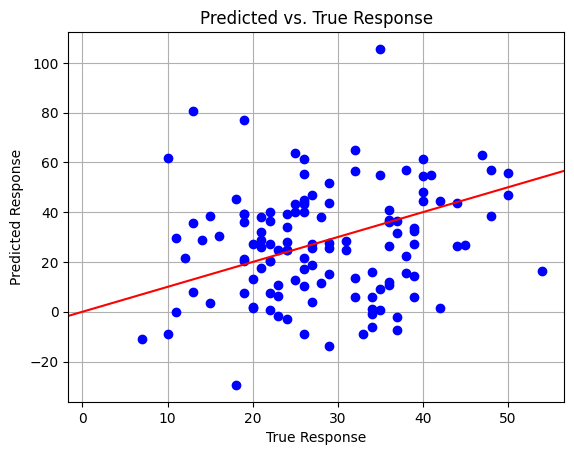

In [17]:
# Extract the true values of Calm1 from the test set
col = test_C_RB['Calm1']

# Create a scatter plot of the true vs. predicted values
# 'bo' specifies blue color ('b') and circle markers ('o')
plt.plot(col, y_pred, 'bo')

# Add a reference line where the predicted values are equal to the true values
# 'slope=1' indicates a line with a 45-degree angle, showing perfect predictions
plt.axline((1, 1), slope=1, color='r')

# Set the title and labels for the plot
plt.title('Predicted vs. True Response')
plt.xlabel('True Response')
plt.ylabel('Predicted Response')

# Add grid lines for better readability
plt.grid()

# Display the plot
plt.show()

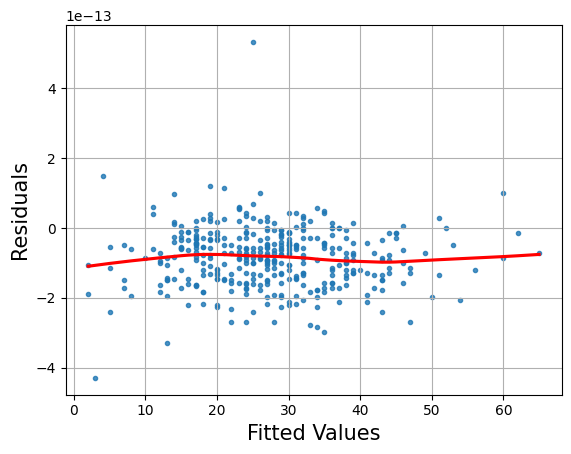

In [18]:
# Get the fitted values from the regression model
fitted_values = mlm_fit_C_RB.fittedvalues

# Get the residuals from the regression model
residuals = mlm_fit_C_RB.resid

# Create a scatter plot of fitted values vs. residuals with a lowess smoothing line
sns.regplot(
    x=fitted_values,  # Fitted values from the model
    y=residuals,      # Residuals (differences between true and fitted values)
    marker='.',       # Use dots for the scatter plot markers
    lowess=True,      # Add a locally weighted scatterplot smoothing line
    line_kws={"color": "red"}  # Color of the lowess line
)

# Label the x-axis
plt.xlabel("Fitted Values", fontsize=15)

# Label the y-axis
plt.ylabel("Residuals", fontsize=15)

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()

## Model 2:

Response: Gene Calm1

Predictors: all cells

In [19]:
# Split the entire dataset into training and test sets
# For Model 2, which uses all cells for prediction
# The data is split into training and test sets with a 75%/25% ratio by default
# 'random_state=1' ensures reproducibility of the split
train_C_all, test_C_all = train_test_split(dataweek1, random_state=1)

In [20]:
# Create a linear regression model using the training data
# The formula excludes the 'CLASS' column, as it is not a predictor in this model
mlm_fit_C_all = smf.ols(
    formula=lm_formula(dataweek1, 'Calm1', ['CLASS']),  # Generate the formula without 'CLASS'
    data=train_C_all  # Use the entire training data
).fit()

# Output the model parameters (coefficients)
mlm_fit_C_all.params

,0
Intercept,1.110126
Acin1,-0.012741
Actb,0.123106
Agap1,-0.046401
Ahi1,-0.113899
...,...
mtNd2,-0.050288
mtNd4,0.055789
mtNd5,-0.005458
mtRnr1,-0.124611


In [21]:
# Calculate the Mean Squared Error (MSE) between the actual values
# and the predicted values for the test set
mlm_fit_C_all.mse_total

97.98538738372744

In [22]:
# Get and display a detailed summary of the linear regression model
# This summary includes information about the coefficients, R-squared, and more
mlm_fit_C_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calm1   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     21.88
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -8059.0
No. Observations:                2793   AIC:                         1.702e+04
Df Residuals:                    2341   BIC:                         1.970e+04
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1101      0.419      2.652      0.008       0.289       1.931
Acin1            -0.0127      0.101     -0.127      0.899      -0.210       0.185
Actb              0.1231      0.094      1.307      0.191      -0.062       0.308
Agap1            -0.0464      0.142     -0.327      0.744      -0.325       0.232
Ahi1             -0.1139      0.116     -0.986      0.324      -0.340       0.113
Akap11           -0.2540      0.138     -1.845      0.065      -0.524       0.016
Akap9             0.2054      0.129      1.598      0.110      -0.047       0.457
Aldoa             0.1202      0.078      1.542      0.123      -0.033       0.273
Aldoc            -0.0439      0.138     -0.317      0.751      -0.315       0.228
Ankrd12          -0.0306      0.080     -0.383      0.702      -0.187       0.126
Anp32a            0.0090      0.057      0.157      0.875      -0.104       0.122
Anp32e            0.0814      0.087      0.937      0.349      -0.089       0.252
Aplp1            -0.0780      0.144     -0.542      0.588      -0.360       0.204
Aplp2             0.0730      0.054      1.344      0.179      -0.034       0.179
Apoe              0.3174      0.187      1.698      0.090      -0.049       0.684
App              -0.1192      0.085     -1.407      0.159      -0.285       0.047
Arglu1           -0.0064      0.113     -0.057      0.955      -0.228       0.215
Arl3             -0.0539      0.139     -0.388      0.698      -0.326       0.219
Arl6ip1           0.1449      0.084      1.736      0.083      -0.019       0.309
Arpc2             0.1368      0.131      1.044      0.296      -0.120       0.394
Atp1a3           -0.0474      0.130     -0.365      0.715      -0.302       0.207
Atp1b2           -0.0759      0.108     -0.706      0.480      -0.287       0.135
Atp2b1           -0.0494      0.043     -1.137      0.256      -0.135       0.036
Atp5a1           -0.0594      0.133     -0.447      0.655      -0.320       0.201
Atp5b            -0.0135      0.094     -0.144      0.886      -0.198       0.171
Atp5c1            0.2687      0.117      2.291      0.022       0.039       0.499
Atp5d            -0.1087      0.148     -0.734      0.463      -0.399       0.182
Atp5f1           -0.0105      0.114     -0.092      0.927      -0.235       0.214
Atp5g3            0.0515      0.108      0.475      0.635      -0.161       0.264
Atp5h             0.1689      0.126      1.343      0.179      -0.078       0.416
Atp5j             0.1099      0.125      0.880      0.379      -0.135       0.355
Atp5j2            0.1177      0.138      0.854      0.393      -0.152       0.388
Atp5k            -0.0426      0.140     -0.305      0.761      -0.317       0.232
Atp5o             0.1405      0.140      1.003      0.316      -0.134       0.415
Atp6v0a1         -0.0634      0.136     -0.465   

In [23]:
# Predict the expression values of Calm1 in the test set
# using the fitted linear regression model 'mlm_fit_C_all'
y_pred = mlm_fit_C_all.predict(test_C_all)

In [24]:
# Calculate the Mean Squared Error (MSE) between the actual values of Calm1
# in the test set and the predicted values
mse2 = mean_squared_error(test_C_all['Calm1'], y_pred)

# Display the Mean Squared Error
mse2

27.1136034139195

In [25]:
# Generate a summary frame of predictions for the test set used in Model 2
# This includes predicted values, standard errors, confidence intervals,
# and prediction intervals for the model's predictions
mlm_fit_C_all.get_prediction(test_C_all).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.521678,2.286763,-2.962614,6.005969,-8.787684,11.831039
1,5.207008,1.970566,1.342772,9.071244,-4.848159,15.262175
2,-0.864431,2.230930,-5.239234,3.510373,-11.126641,9.397780
3,2.294265,1.575763,-0.795771,5.384301,-7.489517,12.078047
4,8.128294,1.721821,4.751842,11.504746,-1.749686,18.006274
...,...,...,...,...,...,...
926,16.736391,2.350032,12.128031,21.344751,6.372461,27.100321
927,4.974973,2.338636,0.388960,9.560987,-5.379039,15.328986
928,10.225250,1.924750,6.450857,13.999643,0.204267,20.246233
929,7.870213,1.940073,4.065772,11.674654,-2.162126,17.902552


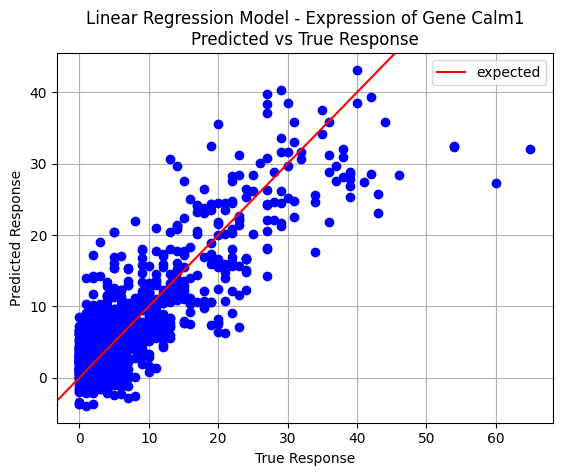

In [26]:
# Extract the true values of Calm1 from the test set
col = test_C_all['Calm1']

# Create a scatter plot of the true values vs. the predicted values
# 'bo' specifies blue color ('b') and circle markers ('o')
plt.plot(col, y_pred, 'bo')

# Add a reference line where the predicted values are equal to the true values
# 'slope=1' indicates a line with a 45-degree angle, showing perfect predictions
# 'label' adds a legend entry for this line
plt.axline((1, 1), slope=1, color='r', label='expected')

# Set the title for the plot with a newline character for better formatting
plt.title('Linear Regression Model - Expression of Gene Calm1' +\
          '\nPredicted vs True Response')

# Label the x-axis
plt.xlabel('True Response')

# Label the y-axis
plt.ylabel('Predicted Response')

# Add a legend to the plot
plt.legend()

# Add grid lines to the plot for better readability
plt.grid()

# Display the plot
plt.show()

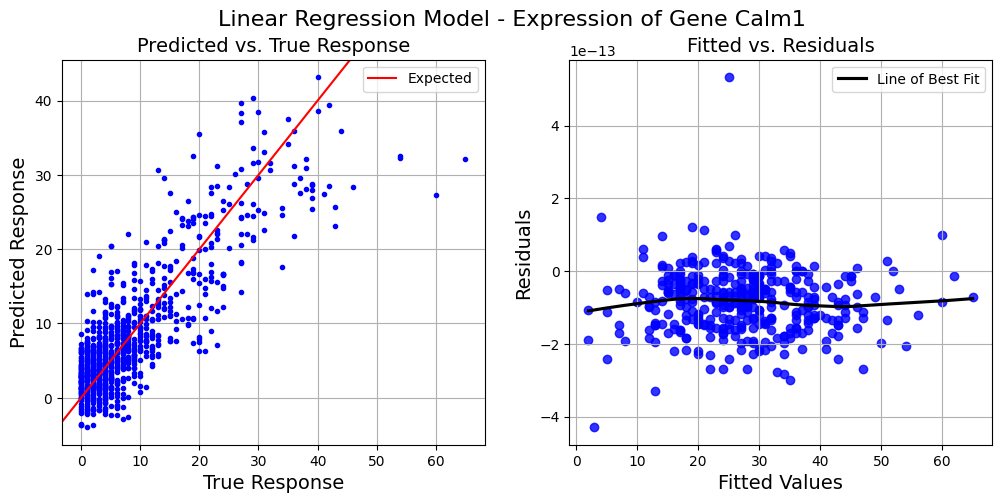

In [27]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Set a super title for the entire figure
fig.suptitle('Linear Regression Model - Expression of Gene Calm1', size=16)

# Subplot 1: Predicted vs. True Response
# Plot the true values vs. predicted values in the first subplot
axs[0].plot(col, y_pred, 'b.')
# Add a reference line where predicted values equal true values
axs[0].axline((1, 1), slope=1, color='r', label='Expected')
# Set the title for the first subplot
axs[0].set_title('Predicted vs. True Response', size=14)
# Label the x-axis of the first subplot
axs[0].set_xlabel('True Response', size=14)
# Label the y-axis of the first subplot
axs[0].set_ylabel('Predicted Response', size=14)
# Add a legend to the first subplot
axs[0].legend()
# Add grid lines to the first subplot
axs[0].grid()

# Subplot 2: Fitted vs. Residuals
# Create a regression plot of fitted values vs. residuals in the second subplot
sns.regplot(x=fitted_values, y=residuals, lowess=True,
            scatter_kws={"marker": ".", "color": "blue"},
            line_kws={"color": "black", "label": "Line of Best Fit"}, ax=axs[1])
# Set the title for the second subplot
axs[1].set_title('Fitted vs. Residuals', size=14)
# Label the x-axis of the second subplot
axs[1].set_xlabel("Fitted Values", size=14)
# Label the y-axis of the second subplot
axs[1].set_ylabel("Residuals", size=14)
# Add a legend to the second subplot
axs[1].legend()
# Add grid lines to the second subplot
axs[1].grid()

# Display the combined plot with both subplots
plt.show()

## Model 3:

Response: Gene Malat1

Predictors: cells in CLASS Amacrine

In [28]:
# Filter the data to include only rows where the CLASS is 'Amacrine'
# This subset will be used to model the expression of the gene Malat1
gene_Am = dataweek1.loc[dataweek1.CLASS == 'Amacrine']

# Display the shape of the filtered DataFrame
# The shape provides the number of rows and columns in the DataFrame
gene_Am.shape

(129, 453)

In [29]:
# Split the 'gene_Am' DataFrame into training and test sets
# 'train_test_split' function randomly splits the data while keeping
# the same random state ensures reproducibility
train_M_Am, test_M_Am = train_test_split(gene_Am, random_state=1)

In [30]:
# Create a linear regression model to predict the expression of gene Malat1
# using cells in the 'Amacrine' class as predictors.
# The formula excludes the 'CLASS' column as it is not a predictor in this model.
mlm_fit_M_Am = smf.ols(
    formula=lm_formula(gene_Am, 'Malat1', ['CLASS']),  # Generate the formula for predicting 'Malat1'
    data=train_M_Am  # Use the training data subset
).fit()

# Output the model parameters (coefficients) of the fitted model
mlm_fit_M_Am.params

,0
Intercept,0.306508
Acin1,-0.680607
Actb,0.908450
Agap1,-0.043238
Ahi1,0.152413
...,...
mtNd2,0.898987
mtNd4,-0.148412
mtNd5,-0.276807
mtRnr1,0.913733


In [31]:
# Display the Mean Squared Error
mlm_fit_M_Am.mse_model

365.6577850877192

In [32]:
# Get a detailed summary of the fitted linear regression model for Malat1
# This includes information about coefficients, statistical significance,
# R-squared value, and other model diagnostics
mlm_fit_M_Am.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Malat1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                nan
Time:                        11:52:04   Log-Likelihood:                 2762.1
No. Observations:                  96   AIC:                            -5332.
Df Residuals:                       0   BIC:                            -5086.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3065        inf          0        nan         nan         nan
Acin1            -0.6806        inf         -0        nan         nan         nan
Actb              0.9085        inf          0        nan         nan         nan
Agap1            -0.0432        inf         -0        nan         nan         nan
Ahi1              0.1524        inf          0        nan         nan         nan
Akap11            0.8572        inf          0        nan         nan         nan
Akap9            -0.1568        inf         -0        nan         nan         nan
Aldoa            -0.4997        inf         -0        nan         nan         nan
Aldoc            -0.5517        inf         -0        nan         nan         nan
Ankrd12           0.5778        inf          0        nan         nan         nan
Anp32a           -0.1731        inf         -0        nan         nan         nan
Anp32e           -0.0299        inf         -0        nan         nan         nan
Aplp1            -0.0554        inf         -0        nan         nan         nan
Aplp2            -0.3679        inf         -0        nan         nan         nan
Apoe             -0.1015        inf         -0        nan         nan         nan
App               0.5572        inf          0        nan         nan         nan
Arglu1           -0.0395        inf         -0        nan         nan         nan
Arl3              0.4605        inf          0        nan         nan         nan
Arl6ip1          -0.2077        inf         -0        nan         nan         nan
Arpc2             0.5665        inf          0        nan         nan         nan
Atp1a3            0.8052        inf          0        nan         nan         nan
Atp1b2            0.0616        inf          0        nan         nan         nan
Atp2b1            0.0923        inf          0        nan         nan         nan
Atp5a1           -0.0654        inf         -0        nan         nan         nan
Atp5b            -0.8794        inf         -0        nan         nan         nan
Atp5c1           -0.0462        inf         -0        nan         nan         nan
Atp5d            -0.4068        inf         -0        nan         nan         nan
Atp5f1           -0.1773        inf         -0        nan         nan         nan
Atp5g3            0.2456        inf          0        nan         nan         nan
Atp5h             0.4859        inf          0        nan         nan         nan
Atp5j             0.4036        inf          0        nan         nan         nan
Atp5j2            0.0934        inf          0        nan         nan         nan
Atp5k            -0.6667        inf         -0        nan         nan         nan
Atp5o             0.0880        inf          0        nan         nan         nan
Atp6v0a1          0.0896        inf          0   

In [33]:
# Predict the expression values of Malat1 in the test set using the fitted model
# The 'predict' method generates predicted values based on the features in 'test_M_Am'
y_pred = mlm_fit_M_Am.predict(test_M_Am)

In [34]:
# Calculate the Mean Squared Error (MSE) for the predictions of Malat1
# Use 'Malat1' column from the test set for comparison
mse3 = mean_squared_error(test_M_Am['Malat1'], y_pred)

# Display the Mean Squared Error
mse3

328.68328216069045

In [35]:
# Generate a summary frame of predictions for the test set used in Model 3
# This includes predicted values, standard errors, confidence intervals,
# and prediction intervals for the model's predictions
mlm_fit_M_Am.get_prediction(test_M_Am).summary_frame()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,18.039269,NaN,NaN,NaN,NaN,NaN
1,32.841178,NaN,NaN,NaN,NaN,NaN
2,29.167844,NaN,NaN,NaN,NaN,NaN
3,29.435157,NaN,NaN,NaN,NaN,NaN
4,34.300714,NaN,NaN,NaN,NaN,NaN
5,49.316032,NaN,NaN,NaN,NaN,NaN
6,31.526003,NaN,NaN,NaN,NaN,NaN
7,39.849346,NaN,NaN,NaN,NaN,NaN
8,33.892986,NaN,NaN,NaN,NaN,NaN
9,19.858159,NaN,NaN,NaN,NaN,NaN


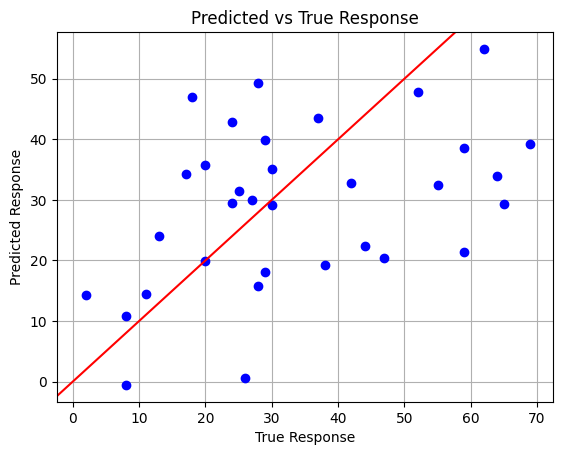

In [36]:
# Extract the true values of Malat1 from the test set
# Note: Make sure the column name is 'Malat1', not 'Calm1', as we are working with Malat1 predictions
col = test_M_Am['Malat1']

# Create a scatter plot of the true values vs. the predicted values
# 'bo' specifies blue color ('b') and circle markers ('o')
plt.plot(col, y_pred, 'bo')

# Add a reference line where the predicted values equal the true values
# 'slope=1' indicates a line with a 45-degree angle, showing perfect predictions
plt.axline((1, 1), slope=1, color='r', label='Expected')

# Set the title for the plot
plt.title('Predicted vs True Response')

# Label the x-axis
plt.xlabel('True Response')

# Label the y-axis
plt.ylabel('Predicted Response')

# Add grid lines to the plot for better readability
plt.grid()

# Display the plot
plt.show()

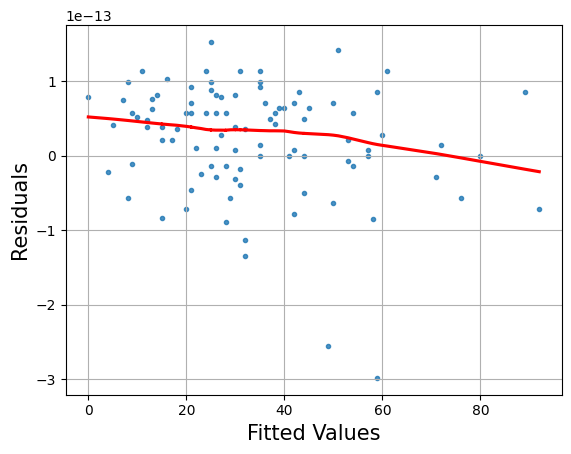

In [38]:
# Obtain the fitted values (predicted values) from the model
fitted_values = mlm_fit_M_Am.fittedvalues

# Calculate the residuals (differences between actual and fitted values)
residuals = mlm_fit_M_Am.resid

# Visualization of fitted values vs. residuals
# Use seaborn's regplot to create a scatter plot with a LOWESS line
# LOWESS line shows a smoothed trend of residuals
sns.regplot(x=fitted_values, y=residuals, marker='.', lowess=True, line_kws={"color": "red"})

# Label the x-axis
plt.xlabel("Fitted Values", fontsize=15)

# Label the y-axis
plt.ylabel("Residuals", fontsize=15)

# Add grid lines for better readability
plt.grid()

# Display the plot
plt.show()

## Model 4:

Response: Gene Malat1

Predictors: all cells

In [39]:
# Split the 'dataweek1' DataFrame into training and test sets
# 'train_test_split' function randomly splits the data while keeping
# the same random state ensures reproducibility
train_M_all, test_M_all = train_test_split(dataweek1, random_state=1)

In [40]:
# Create a linear regression model to predict the expression of gene Malat1
# using all cells as predictors, excluding the 'CLASS' column
# 'lm_formula' generates the formula for predicting 'Malat1'
mlm_fit_M_all = smf.ols(
    formula=lm_formula(dataweek1, 'Malat1', ['CLASS']),  # Generate the formula for predicting 'Malat1'
    data=train_M_all  # Use the training data subset
).fit()

# Output the model parameters (coefficients) of the fitted model
mlm_fit_M_all.params

,0
Intercept,1.705336
Acin1,-0.033007
Actb,0.109753
Agap1,-0.258550
Ahi1,0.124322
...,...
mtNd2,0.294374
mtNd4,0.441825
mtNd5,-0.221540
mtRnr1,1.060480


In [41]:
# Determine which predictors in the fitted model have p-values less than 0.05
# A p-value less than 0.05 typically indicates statistical significance
is_sig = mlm_fit_M_all.pvalues < 0.05

# Count the number of statistically significant predictors
sum(is_sig)

72

In [43]:
# Calculate the Mean Squared Error (MSE) by comparing
# the true values with predicted values
mlm_fit_M_all.mse_total

229.02297803452555

In [42]:
# Get a detailed summary of the fitted linear regression model for Malat1
# This includes information about coefficients, statistical significance,
# R-squared value, and other model diagnostics
mlm_fit_M_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Malat1   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     6.825
Date:                Thu, 05 Sep 2024   Prob (F-statistic):          1.03e-216
Time:                        11:59:34   Log-Likelihood:                -10379.
No. Observations:                2793   AIC:                         2.166e+04
Df Residuals:                    2341   BIC:                         2.434e+04
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7053      0.961      1.774      0.076      -0.180       3.590
Acin1            -0.0330      0.231     -0.143      0.886      -0.486       0.420
Actb              0.1098      0.216      0.508      0.612      -0.314       0.534
Agap1            -0.2585      0.325     -0.794      0.427      -0.897       0.380
Ahi1              0.1243      0.265      0.469      0.639      -0.396       0.644
Akap11            0.9458      0.315      2.998      0.003       0.327       1.564
Akap9             1.1335      0.294      3.853      0.000       0.557       1.710
Aldoa            -0.0111      0.179     -0.062      0.950      -0.362       0.340
Aldoc            -0.1415      0.318     -0.445      0.656      -0.765       0.482
Ankrd12           0.1675      0.183      0.915      0.360      -0.191       0.526
Anp32a            0.0935      0.132      0.709      0.478      -0.165       0.352
Anp32e            0.3731      0.199      1.873      0.061      -0.017       0.764
Aplp1            -0.5274      0.330     -1.598      0.110      -1.175       0.120
Aplp2            -0.0343      0.125     -0.275      0.783      -0.279       0.210
Apoe              1.4059      0.428      3.282      0.001       0.566       2.246
App              -0.0973      0.194     -0.500      0.617      -0.479       0.284
Arglu1            0.2359      0.259      0.911      0.362      -0.272       0.744
Arl3              0.4013      0.319      1.258      0.208      -0.224       1.027
Arl6ip1           0.0843      0.192      0.440      0.660      -0.292       0.460
Arpc2            -0.2792      0.301     -0.929      0.353      -0.868       0.310
Atp1a3            0.2571      0.298      0.863      0.388      -0.327       0.841
Atp1b2           -0.4040      0.247     -1.637      0.102      -0.888       0.080
Atp2b1            0.1089      0.100      1.092      0.275      -0.087       0.304
Atp5a1            0.1996      0.305      0.655      0.512      -0.398       0.797
Atp5b            -0.0420      0.215     -0.195      0.846      -0.464       0.381
Atp5c1            0.1878      0.269      0.697      0.486      -0.340       0.716
Atp5d            -0.3750      0.340     -1.104      0.270      -1.041       0.291
Atp5f1            0.0315      0.262      0.120      0.904      -0.483       0.546
Atp5g3           -0.0806      0.249     -0.324      0.746      -0.568       0.407
Atp5h             0.4801      0.288      1.664      0.096      -0.086       1.046
Atp5j             0.8181      0.286      2.861      0.004       0.257       1.379
Atp5j2            0.1510      0.316      0.478      0.633      -0.469       0.771
Atp5k            -0.6676      0.320     -2.083      0.037      -1.296      -0.039
Atp5o             0.2063      0.322      0.642      0.521      -0.424       0.837
Atp6v0a1         -0.1893      0.313     -0.605   

In [44]:
# Predict the expression values of Malat1 in the test set using the fitted model
# 'predict' method generates predicted values based on the features in 'test_M_all'
y_pred = mlm_fit_M_all.predict(test_M_all)

In [45]:
# Calculate the Mean Squared Error (MSE) by comparing the true values of Malat1 with the predicted values
mse4 = mean_squared_error(test_M_all['Malat1'], y_pred)

# Display the Mean Squared Error
mse4

145.7779631323644

In [46]:
# Generate a summary frame of predictions for the test set used in Model 4
# This includes predicted values, standard errors, confidence intervals,
# and prediction intervals for the model's predictions
mlm_fit_M_all.get_prediction(test_M_all).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,37.915452,5.238796,27.642289,48.188615,14.266189,61.564715
1,17.939233,4.517283,9.080942,26.797525,-5.130640,41.009107
2,42.287616,5.119338,32.248706,52.326525,18.739167,65.836064
3,21.216295,3.610054,14.137058,28.295532,-1.230650,43.663240
4,15.981316,3.955015,8.225618,23.737013,-6.688060,38.650691
...,...,...,...,...,...,...
926,16.577884,5.402834,5.983047,27.172722,-7.212877,40.368646
927,20.437131,5.367171,9.912228,30.962034,-3.322569,44.196830
928,24.338833,4.370978,15.767441,32.910224,1.377594,47.300071
929,23.978717,4.452101,15.248245,32.709189,0.957621,46.999813


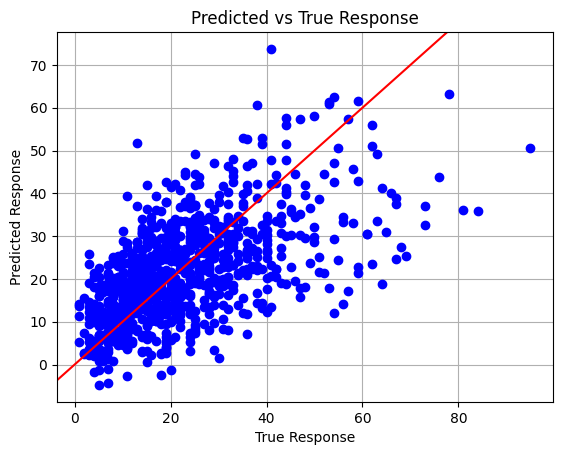

In [47]:
# Extract the true values of Malat1 from the test set
col = test_M_all['Malat1']

# Create a scatter plot of the true values vs. the predicted values
# 'bo' specifies blue color ('b') and circle markers ('o')
plt.plot(col, y_pred, 'bo')

# Add a reference line where the predicted values equal the true values
# 'slope=1' indicates a line with a 45-degree angle, showing perfect predictions
plt.axline((1, 1), slope=1, color='r', label='Expected')

# Set the title for the plot
plt.title('Predicted vs True Response')

# Label the x-axis
plt.xlabel('True Response')

# Label the y-axis
plt.ylabel('Predicted Response')

# Add grid lines to the plot for better readability
plt.grid()

# Display the plot
plt.show()

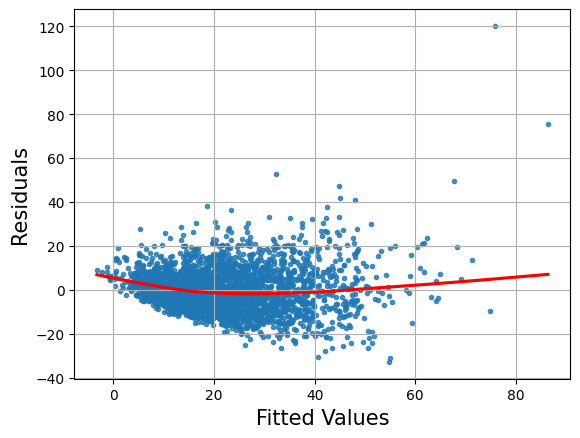

In [48]:
# Obtain the fitted values (predicted values) from the model
fitted_values = mlm_fit_M_all.fittedvalues

# Calculate the residuals (differences between actual and fitted values)
residuals = mlm_fit_M_all.resid

# Visualization of fitted values vs. residuals
# Use seaborn's regplot to create a scatter plot with a LOWESS line
# LOWESS line shows a smoothed trend of residuals
sns.regplot(x=fitted_values, y=residuals, marker='.', lowess=True, line_kws={"color": "red"})

# Label the x-axis
plt.xlabel("Fitted Values", fontsize=15)

# Label the y-axis
plt.ylabel("Residuals", fontsize=15)

# Add grid lines for better readability
plt.grid()

# Comparision

In [49]:
# Create a dictionary with statistics for each model
# Each key represents a model, and each value is another dictionary with metrics
data = {
    'Calm1/RB': {
        'Significant predictors': int(sum(mlm_fit_C_RB.pvalues < 0.05)),  # Count of predictors with p-values < 0.05
        'R-squared': mlm_fit_C_RB.rsquared,  # R-squared value for the model
        'AIC': mlm_fit_C_RB.aic,  # Akaike Information Criterion (AIC) for model selection
        'BIC': mlm_fit_C_RB.bic,  # Bayesian Information Criterion (BIC) for model selection
        'MSE': mse1  # Mean Squared Error for the model's predictions
    },
    'Calm1/all': {
        'Significant predictors': int(sum(mlm_fit_C_all.pvalues < 0.05)),  # Count of predictors with p-values < 0.05
        'R-squared': mlm_fit_C_all.rsquared,  # R-squared value for the model
        'AIC': mlm_fit_C_all.aic,  # Akaike Information Criterion (AIC) for model selection
        'BIC': mlm_fit_C_all.bic,  # Bayesian Information Criterion (BIC) for model selection
        'MSE': mse2  # Mean Squared Error for the model's predictions
    },
    'Malat1/Am': {
        'Significant predictors': int(sum(mlm_fit_M_Am.pvalues < 0.05)),  # Count of predictors with p-values < 0.05
        'R-squared': mlm_fit_M_Am.rsquared,  # R-squared value for the model
        'AIC': mlm_fit_M_Am.aic,  # Akaike Information Criterion (AIC) for model selection
        'BIC': mlm_fit_M_Am.bic,  # Bayesian Information Criterion (BIC) for model selection
        'MSE': mse3  # Mean Squared Error for the model's predictions
    },
    'Malat1/all': {
        'Significant predictors': int(sum(mlm_fit_M_all.pvalues < 0.05)),  # Count of predictors with p-values < 0.05
        'R-squared': mlm_fit_M_all.rsquared,  # R-squared value for the model
        'AIC': mlm_fit_M_all.aic,  # Akaike Information Criterion (AIC) for model selection
        'BIC': mlm_fit_M_all.bic,  # Bayesian Information Criterion (BIC) for model selection
        'MSE': mse4  # Mean Squared Error for the model's predictions
    }
}

# Convert the dictionary into a DataFrame for easy comparison
df = pd.DataFrame(data)

# Display the DataFrame
df


,Calm1/RB,Calm1/all,Malat1/Am,Malat1/all
Significant predictors,0.000000,61.000000,0.000000,72.000000
R-squared,1.000000,0.808241,1.000000,0.568006
AIC,-20492.975357,17021.904951,-5332.190349,21661.571150
BIC,-19020.378097,19704.466898,-5086.012923,24344.133098
MSE,507.228804,27.113603,328.683282,145.777963
